<a href="https://colab.research.google.com/github/mokshmahajan2004/VGG19_Deep-Learning/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libaries**

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,recall_score,precision_score,f1_score

In [2]:
 pip install split-folders[full]

In [3]:
import splitfolders
input_folder = '/content/drive/MyDrive/Colab Notebooks/train'
splitfolders.ratio(input_folder,output = "dataset" ,
                   seed = 1337,ratio = (0.7,0.2,0.1),
                   group_prefix = None
                   )

Copying files: 2800 files [01:54, 24.35 files/s] 


In [4]:
 train_path = '/content/dataset/train'
 test_path = '/content/dataset/test'
 val_path = '/content/dataset/val'

Closed_Eyes


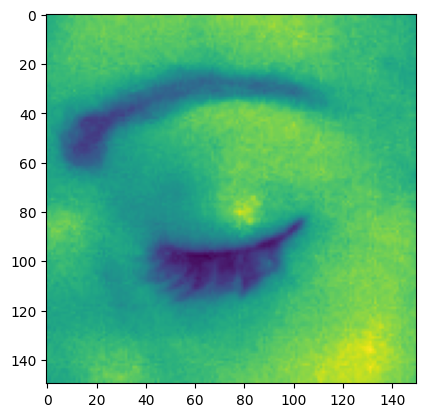

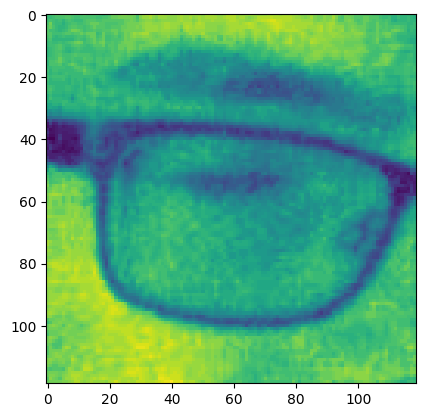

Open_Eyes


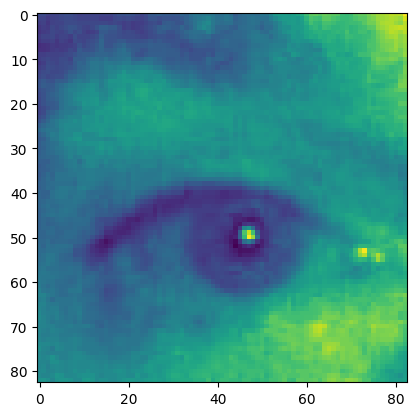

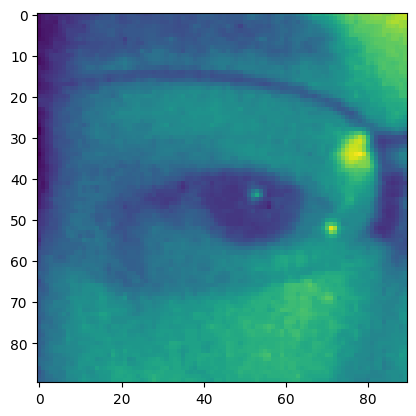

In [5]:
# for folder in os.listdir(train_path):
# #   sub_path = os.path.join(train_path, folder)
#     sub_path = train_path + '/' + folder

#     print(folder)
# for i in range(2):
#   temp_path = os.listdir(sub_path)[i]
#   temp_path = sub_path + "/" + temp_path
#   img = mpimg.imread(temp_path)
#   implt = plt.imshow(img)
#   plt.show()


for folder in os.listdir(train_path):
    sub_path = os.path.join(train_path, folder)
    print(folder)

    # Ensure that you list the images inside each folder
    images = os.listdir(sub_path)

    for i in range(min(2, len(images))):  # Ensure you don't go out of bounds
        temp_path = os.path.join(sub_path, images[i])
        img = mpimg.imread(temp_path)
        plt.imshow(img)
        plt.show()


In [6]:
def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
    sub_path = os.path.join(path, folder)

    for img in os.listdir(sub_path):
      image_path = os.path.join(sub_path, img)
      img = cv2.imread(image_path)
      img = cv2.resize(img,size)
      data.append(img)
  return data

In [7]:
size = (224,224)
train_data = imagearray(train_path,size)
test_data = imagearray(test_path,size)
val_data = imagearray(val_path,size)

# **Normalization**

In [8]:
train_data = np.array(train_data)
test_data = np.array(test_data)
val_data = np.array(val_data)

In [9]:
x_train = train_data/255
x_test = test_data/255
x_val = val_data/255

# **Defining target variables**

In [10]:
def data_class(data_path,size,class_mode):
  datagen=ImageDataGenerator(rescale=1./255)
  return datagen.flow_from_directory(data_path,target_size=size,batch_size=32,class_mode=class_mode)

In [11]:
train_class = data_class(train_path,size,'sparse')
test_class = data_class(test_path,size,'sparse')
val_class = data_class(val_path,size,'sparse')

Found 1958 images belonging to 2 classes.
Found 282 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [12]:
y_train=train_class.classes
y_test=test_class.classes
y_val=val_class.classes

In [13]:
train_class.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [14]:
train_class.class_indices

{'Closed_Eyes': 0, 'Open_Eyes': 1}

In [15]:
print("y_train_shape",y_train.shape,
"y_test_shape",y_test.shape,
"y_val_shape",y_val.shape)

y_train_shape (1958,) y_test_shape (282,) y_val_shape (560,)


# **VGG19 Model**

In [16]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable=False

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(3,activation='softmax')(x)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

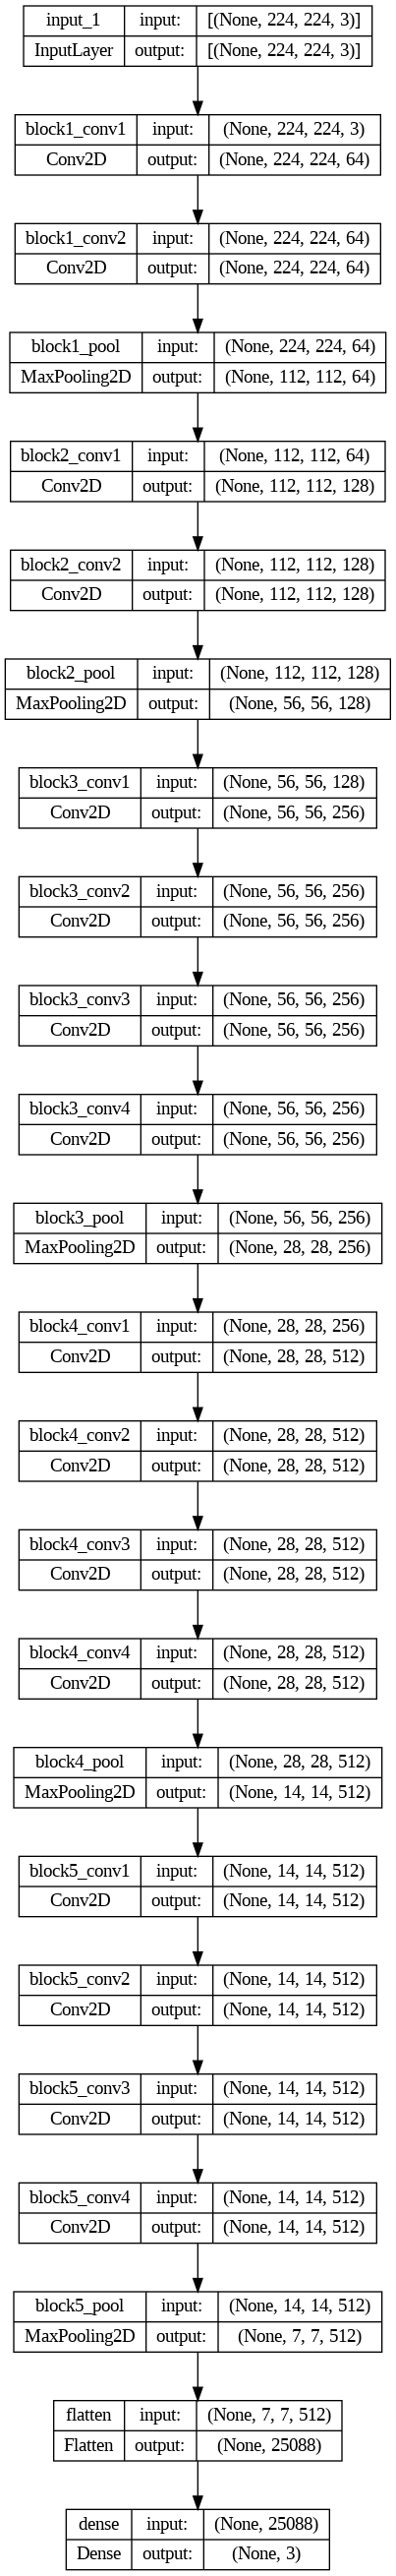

In [20]:
 plot_model(model=model,show_shapes=True)

In [21]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='min')

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,
          epochs=5,
          validation_data=(x_val,y_val),
          callbacks=[early_stop],
          batch_size=30,
          shuffle=True)

Epoch 1/5
66/66 [==============================] - 1927s 29s/step - loss: 0.3884 - accuracy: 0.8320 - val_loss: 0.1888 - val_accuracy: 0.9196
Epoch 2/5
66/66 [==============================] - 1817s 28s/step - loss: 0.1521 - accuracy: 0.9484 - val_loss: 0.1419 - val_accuracy: 0.9429
Epoch 3/5
66/66 [==============================] - 1868s 28s/step - loss: 0.1190 - accuracy: 0.9561 - val_loss: 0.1280 - val_accuracy: 0.9661
Epoch 4/5
66/66 [==============================] - 1892s 29s/step - loss: 0.1064 - accuracy: 0.9622 - val_loss: 0.0895 - val_accuracy: 0.9661
Epoch 5/5
66/66 [==============================] - 1801s 27s/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.0769 - val_accuracy: 0.9857
